### DS102 | In Class Practice Week 1C - Univariate Analysis I
<hr>
## Learning Objectives

### In Class Content
At the end of the lesson, you will be able to:

1. Find summary statistics of a dataset using `describe()`

2. Calculate and interpret the **mean**, **median** and **mode** of a sample using `mean()`, `median()` and `mode()`

3. Calculate and interpret **variance** and **standard deviation** of a sample using `var()` and `std()`

### Self Study Content
At the end of your self-study, you will be able to:

4. Calculate and interpret **skewness** and **kurtosis** of a sample using `skew()` and `kurt()`

### Datasets Required for this In Class
1. `wines-3k.csv`

### Import `pandas`, `numpy` and read the CSV file into a `df`

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Read the dataset from `wines-3k.csv` into a `df`. Specify the `sep` parameter as the separator right now is no longer a comma.

In [4]:
# Read CSV file to a df.
#
df = pd.read_csv('wines-3k.csv', sep='|')
df.head(3)

,country,points,price
0,US,84,12.0
1,Italy,87,15.0
2,US,86,48.0


It is good practice to do some preliminary analysis on the newly created `df`.

In [5]:
# Exercise: print the shape of the df
print(df.shape)
# Exercise: print the dtypes of the df
#
print(df.dtypes)
# Exercise: print the columns of the df
#

(3000, 3)
country     object
points       int64
price      float64
dtype: object


In [8]:
# Exercise: Display the first 5 records of the df
#
df.head()

,country,points,price
0,US,84,12.0
1,Italy,87,15.0
2,US,86,48.0
3,US,89,150.0
4,Italy,89,59.0


### Retrieve Summary Statistics
Use `describe()` to find out summary statistics of each of the columns in a `df`. Take note of what each row means. In particular, the quartiles and the percentiles.

In [9]:
# Use describe() to show summary statistics
df.describe()

,points,price
count,3000.000000,2718.000000
mean,87.868000,32.773731
std,3.153605,31.288298
min,80.000000,5.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,500.000000


Country is a **categorical field**, which means it takes a (string) value, selected from a list. Use `df['country'].describe()` to show summary statistics of a categorical field. Here's how you interpret the result:

- `unique` represents the number of **unique values** of the column

- `top` represents the **most frequent value** in the column

- `freq` represents the **count of the most frequent value** in the column

In [10]:
# Perform describe() on one column.
df['country'].describe()

# Note how the display is different from that of a numerical Series
# Exercise: How will you jointly interpret the value for 'top' and 'freq' with reference to the dataset?
# 

count     3000
unique      28
top         US
freq      1269
Name: country, dtype: object

To find all the unique values of `country`, use `df['country'].unique()` .

In [12]:
# Use Series.unique() to see all the unique values.
list(df['country'].unique())

['US',
 'Italy',
 'Spain',
 'Portugal',
 'France',
 'Argentina',
 'Australia',
 'Austria',
 'New Zealand',
 'South Africa',
 'Chile',
 'Germany',
 'Israel',
 'Slovakia',
 'Canada',
 'Greece',
 'Georgia',
 'Uruguay',
 'Bulgaria',
 'Mexico',
 'Romania',
 'Bosnia and Herzegovina',
 'Croatia',
 'Cyprus',
 'India',
 'Hungary',
 'Slovenia',
 'Moldova']

To find the number of unique `country`(ies), use `df['country'].nunique()`. This is the same as finding the number of elements in `df['country']` using `len()`.

In [13]:
# Find the no. of unique values using nunique()
df['country'].nunique()

# Find the no. of unique values using len()
# len(df['country'].unique())

28

### Simple Aggregation

In [16]:
# Exercise: Store all the wines made in Chile in a df called chile_df
chile_df = df[df['country'] == 'Chile']
chile_df.head()

,country,points,price
51,Chile,84,15.0
70,Chile,87,13.0
79,Chile,86,9.0
83,Chile,90,35.0
85,Chile,85,10.0


Use `sum()` to find the sum of all values in a column.

In [17]:
chile_df.columns

Index(['country', 'points', 'price'], dtype='object')

In [18]:
# Q. How much would it cost, in total, to buy 1 bottle of every wine produced in Chile?
#
chile_df['price'].sum()

2161.0

Use `min()` to get the minimum value in a column.

In [19]:
# Q. How much does the cheapest bottle of wine produced in Chile cost?
#
chile_df['price'].min()

7.0

Use `max()` to get the maximum value in a column.

In [20]:
# Q. What is the highest score given to any bottle of wine produced in Chile?
#
chile_df['points'].max()

95

Use `count()` to find the number of records in a `Series`.

In [21]:
#How many wines are there from Chile?
chile_df['country'].count()

95

### Measures of Central Tendency - Mean, Median, Mode

**Mean of a sample, $\bar{x}$**
The formula for this is
$$\frac{\sum_i x_i}{n}$$
where $x_i$ is the point value for the $i$-th wine and $n$ is the number of wines in the dataset.

In [22]:
# Q. What is the mean of the points of all wines?
#
df['points'].mean()

87.868

**Median of a sample, or $50\text{th percentile}$ of a sample**

The value output here simply means $50\%$ of the observations is equal to or above this value, and the other $50\%$ of the observations is below this value.

In [23]:
# Q. What is the median of the points of all wines?
#
df['points'].median()

88.0

**Mode of a sample**, or most frequently occuring value

In [24]:
# Q. What is the mode of points of all wines?
#
df['points'].mode() #.iloc[0]

0    87
dtype: int64

Validate the value above against the against the aggregation result and histogram plot below.
<div class="alert alert-info">
<b>DS102 Learning Guidelines: </b> `groupby()` will only be covered in Week 2. Plotting will only be covered in Week 3. You are only expected to <b>interpret</b> the results.
</div>

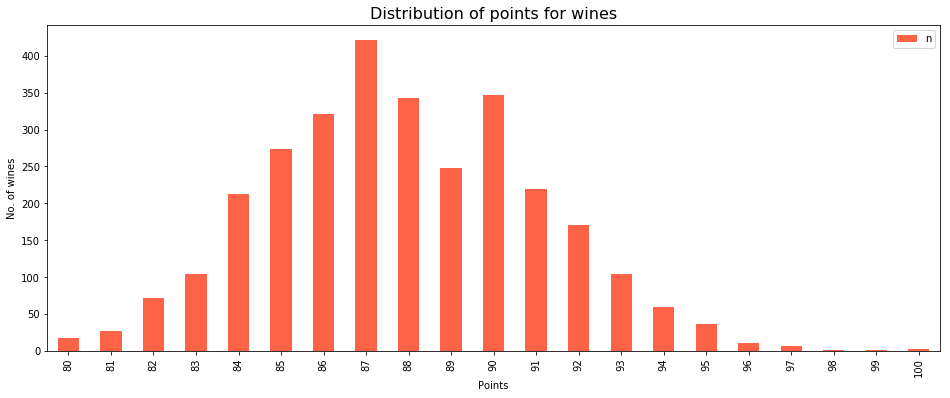

In [28]:
# Use groupby() to aggregate the dataset and then use size() to get the number of records.
# Convert this result to a df, where the size() column is renamed to 'n'
df_p_agg = df.groupby('points').size().reset_index(name='n')
# print(df_p_agg) # Uncomment this line to see the results of the aggregation

# Plot the graph
fig, ax = plt.subplots()
df_p_agg.plot(kind='bar', x='points', y='n', ax=ax, figsize=(16, 6), color='tomato',)
# Add the x-axis label, y-axis label (name of the axes) and the title
ax.set_ylabel("No. of wines")
ax.set_xlabel("Points")
plt.title("Distribution of points for wines", fontsize=16)
# Show the result
plt.show()

### Measures of Spread - Variance, Standard Deviation

**Variance, $\sigma^2$**

Variance is measured by taking the average of all distances of each observation from the mean. The larger the variance, the more spread out the dataset is. Mathematically,

$$\sigma^2 = \frac{\sum_i (x_i - \bar x)^2}{n}$$

where $n$ is the number of wines.

**Be careful!** Specify `axis=0` as you are calculating the variance of a column. `axis=1` will represent calculating across a row.

In [6]:
# Use Series.var(axis=0) to get the variance of the Series. 
# What is the variance of points of all wines in the dataset?
#
df['points'].var()

9.94522440813595

**Standard Deviation, $\sigma$**
Use `Series.std(axis=0)` to find the standard deviation of a numerical `Series`. Since the standard deviation is the square-root of the variance, taking variance, $\sigma^2$ to the power of $\frac 12$ will also return the standard deviation. Mathematically,

$$\sigma = \sqrt {\sigma^2} = \sqrt{\frac{\sum_i (x_i - \bar x)^2}{n}}$$

In [30]:
# Use Series.std(axis=0) to get the variance of the Series. 
# What is the standard deviation of points of all wines in the dataset?
#
df['points'].std()

3.1536049860653197

In [10]:
# The LHS of this is the calculated standard deviation while 
# the RHS is the square root of the variance. They are equal.
# Your turn: What do you need to the RHS so that the expression is True?

df['points'].std(axis=0) == math.sqrt(df['points'].var(axis=0))

True

<hr>
## Self Study Content

### Advanced Sample Statistics - Skewness

Use `Series.skew()` to find the skewness of the dataset. This will mean if the dataset is left-tailed or right-tailed. If the dataset is left-tailed, then more datapoints are higher than the mean. If the dataset is right-tailed, more datapoints are lower than the mean.

Interpret the skewness score as follows:
- If the skewness is $0$ then the observations are symmetrical. 
- If the skewness is positive $(>0)$ then the dataset is skewed right (right-tailed). 
- If the skewness is negative $(<0)$then the dataset is left-skewed (left-tailed).

In [15]:
# Use Series.skew() to find the skewness of 'price
df['price'].skew()

# Q. Using the results, which series is (relatively) symmetrical? 
# no
# Q. In which direction is 'price' skewed?
# right-tailed

5.07330043918119

<div class="alert alert-info">
<b>DS102 Learning Guidelines: </b> Plotting will only be covered in Week 3. You are only expected to <b>interpret</b> the results.
</div>

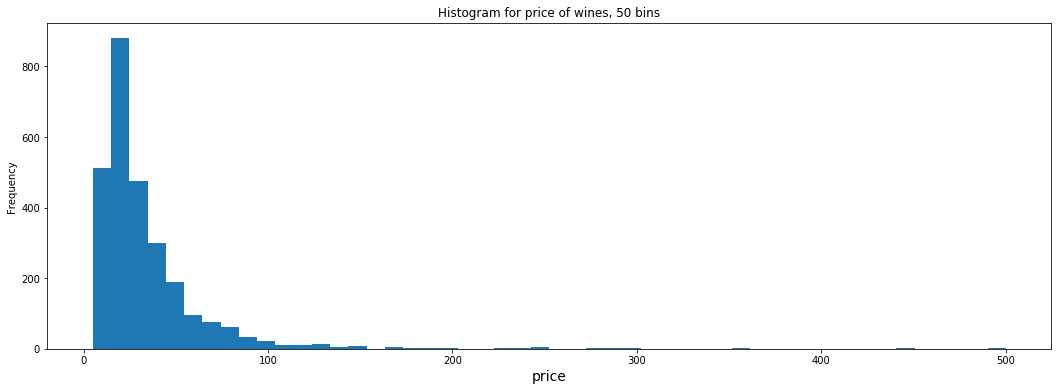

In [16]:
# Create the figure and the subplots
plt.figure(figsize=(18, 6))
#Plot the histogram for 'price'. 
ax1 = plt.subplot(111)
df['price'].plot(kind='hist', bins=50 , ax=ax1)
ax1.set_xlabel("price", fontsize=14)
plt.title("Histogram for price of wines, 50 bins")
# Show the plot
plt.show()

### Advanced Sample Statistics - Kurtosis

Use `Series.kurt()` to find the kurtosis score of the dataset. This will mean how heavy the tails are, compared to a normal distribution.

Compared to a (fitted) normal distribution, if the observations have excessively fat tails, the kurtosis is positive. The kurtosis of a normal distribution is $0$. If the observations a very light tail, then the kurtosis is negative.

In [11]:
# Find the kurtosis score of 'points'
df['points'].kurt()

-0.17706562389098268

<div class="alert alert-info">
<b>DS102 Learning Guidelines: </b> Plotting will only be covered in Week 3. Plotting a fitted curve is not covered in DS102. You are only expected to <b>interpret</b> the results.
</div>

NameError: name 'norm' is not defined

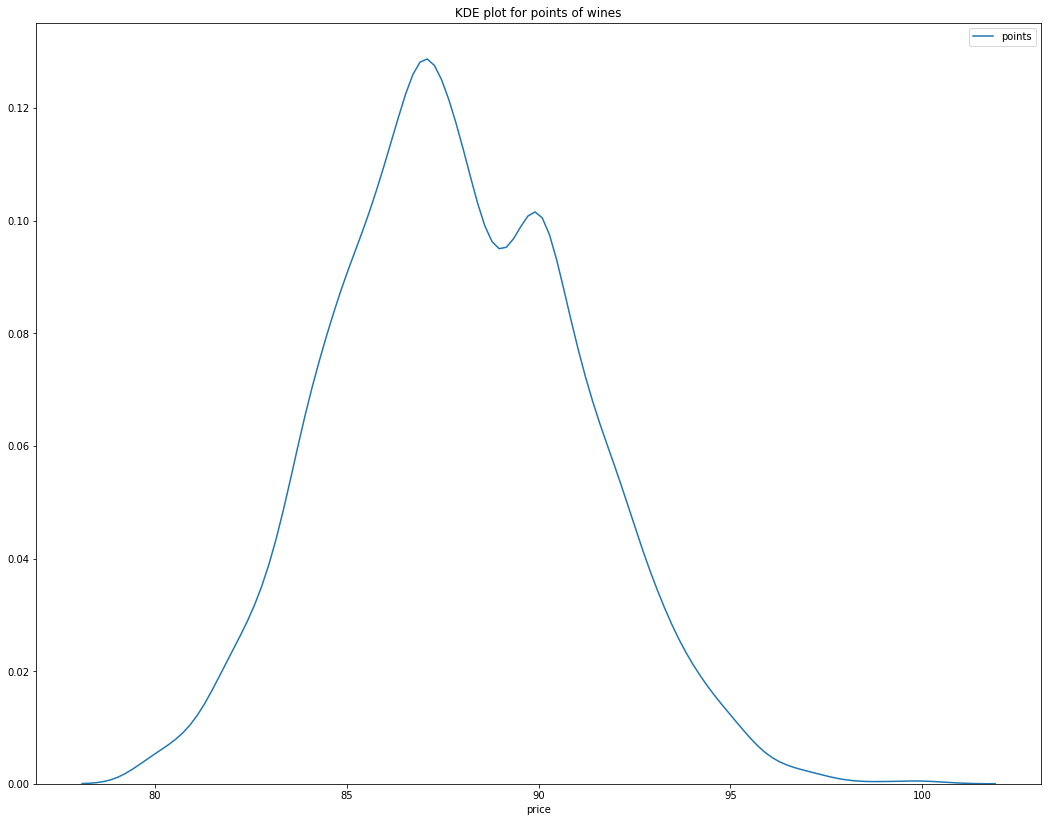

In [13]:
import seaborn as sns

# Plots will be covered in Week 3
plt.figure(figsize=(18, 14))
# Plot the histogram
ax1 = plt.subplot(111)
sns.kdeplot(df['points'])
ax1.set_xlabel("price")
plt.title("KDE plot for points of wines")

# Uncomment the lines below to show the fitted normal plot
# Note: Plotting a fitted plot is not in the DS102 syllabus
# Get the limits of the plot
xmin, xmax = plt.xlim()
# Extend the limits by 4 on both ends. In this limit, create 120 evenly spaced points representing
# a series of 120 x-coordinates. This is to clearly see how the tail-end of the distribution looks like
# to determine kurtosis
x = np.linspace(xmin-4, xmax+4, 120)
# Given the parameters of a normal distribution, calculate the y-coordinates
p = norm.pdf(x, df['points'].mean(), df['points'].std())
# Plot this fitted normal curve on the same subplot
plt.plot(x, p, 'k', linewidth=2, color='black')

# Show the plot
plt.show()

**Credits**
- [Wine Reviews, Kaggle](https://www.kaggle.com/zynicide/wine-reviews) for the dataset
<hr>
`HWA-DS102-INCLASS-1C-201810`